## DIABETIC PATIENTS PREDICTION MODEL

NAME : SREELAKSHMI K M

Organization: Entri Elevate

1. **Overview of Problem Statement:**


The early prediction of diabetic patients’ readmissions within 30 days after hospital discharge is a crucial challenge in healthcare management. Identifying patients who are at high risk for early readmission can lead to proactive management, improved healthcare outcomes, and potentially lower healthcare costs. Given the complexity of patient profiles, medical history, hospital encounters, and test results, developing an effective predictive model is important for accurate forecasting.

The goal is to build a machine learning model that predicts whether a diabetic patient will be readmitted within 30 days of discharge, using available clinical and hospital data. This model will support healthcare providers in taking timely interventions to reduce readmission rates and improve patient care.



2. **Objective:**

The objective of this project is to build a classification model that can predict whether a diabetic patient will be readmitted within 30 days based on their clinical and hospital encounter data. The outcome will be a predictive tool to assist healthcare providers in managing at-risk patients by enabling early interventions.

   3.**Data Description:**

The dataset used for this project is the Diabetes 130-US Hospitals for Years 1999-2008 dataset, which is available from the UCI Machine Learning Repository.

Features: Patient Demographics:

Age: The patient's age at the time of admission.

Gender: The gender of the patient.

Race: The racial background of the patient.

Medical History and Visits:

Number of outpatient visits: Number of visits to the outpatient department before hospitalization.

Number of inpatient visits: Number of inpatient admissions before hospitalization.

Number of emergency visits: Number of emergency room visits before hospitalization.

Hospital Encounter Data:

Admission type: Type of admission (e.g., emergency, urgent, elective).

Time spent in the hospital: The number of days the patient spent in the hospital.

Number of lab tests: The number of lab tests performed during hospitalization.

Medications administered: The number and types of medications administered during hospitalization.

Test Results:

HbA1c levels: Lab test results related to the patient’s glycemic control.

Treatment Information:

Diabetic medications prescribed: Whether the patient was prescribed diabetic medication during the hospitalization.

Medical specialties of admitting physicians: The specialty of the physician who admitted the patient (e.g., endocrinology).

Target Column: Readmitted: Whether the patient was readmitted to the hospital within 30 days after discharge (Yes/No).

4. **Data Collection:**

 The data for this project can be obtained from the UCI Machine Learning Repository. The dataset contains historical data from 130 US hospitals spanning from 1999 to 2008.

# **Data Collection:**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Diabetic_Data.csv to Diabetic_Data.csv


### **Import necessary libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PowerTransformer
from scipy.stats import skew

### **Loading dataset**

In [3]:
# Read CSV file
df= pd.read_csv('Diabetic_Data.csv')

In [5]:
# Check the first few rows of the dataset
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [6]:
df.tail()

encounter_id  patient_nbr             race  gender      age weight  \
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
101761                 3  ...          No    Down                   No   
101762                 5  ...          No  Steady                   No   
101763                 1  ...          No    Down                   No   
101764                10  ...          No      Up                   No   
101765                 6  ...          No      No                   No   

        glipizide-metformin  glimepiride-pioglitazone  \
101761                   No                        No   
101762                   No                        No   
101763                   No                        No   
101764                   No                        No   
101765                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
101761                       No                      No      Ch         Yes   
101762                       No                      No      No         Yes   
101763                       No                      No      Ch         Yes   
101764                       No                      No      Ch         Yes   
101765                       No                      No      No          No   

       readmitted  
101761        >30  
101762         NO  
101763         NO  
101764         NO  
101765         NO  

[5 rows x 50 columns]

## **5. Data Preprocessing- Data Cleaning**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
# Check initial shape
print(f"Initial shape of the data: {df.shape}")

Initial shape of the data: (101766, 50)


In [9]:
df.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

### **Checking missing values**

In [10]:
# Check for missing values
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
examide                         0
citoglipton                     0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
readmitted                      0
dtype: int64

There is null values in the data set

In [11]:
# 1. Check Missing Values Percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing Values Percentage:\n", missing_percentage[missing_percentage > 0])


Missing Values Percentage:
 max_glu_serum    94.746772
A1Cresult        83.277322
dtype: float64


In [12]:
# 2. Identify columns to drop based on missing value threshold
threshold = 30  # Drop columns if missing values > 30%
cols_to_drop = missing_percentage[missing_percentage > threshold].index

# Ensure columns exist before dropping
cols_to_drop = [col for col in cols_to_drop if col in df.columns]
df.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped columns: {list(cols_to_drop)}")


Dropped columns: ['max_glu_serum', 'A1Cresult']


In [13]:
# 3: Impute missing values for the remaining columns
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna("Unknown", inplace=True)
print("Missing values after handling:\n", df.isnull().sum().sum())

Missing values after handling:
 0


Now there is no null values in the data set.

In [14]:
df.shape

(101766, 48)

In [15]:
# checking duplications
df.duplicated().sum()

np.int64(0)

In this data set have no duplicates.

## Check for Outliers:

In [16]:
# Finding highly Skewed features
import pandas as pd
numeric_cols = df.select_dtypes(include=['number'])

# Check skewness for numeric features
skewed_cols = numeric_cols.skew()

# Identify highly skewed features (absolute skewness > 1)
highly_skewed = skewed_cols[abs(skewed_cols) > 1]

# Display skewed columns
print("Highly Skewed Features:")
print(highly_skewed)


Highly Skewed Features:
admission_type_id            1.591984
discharge_disposition_id     2.563067
admission_source_id          1.029935
time_in_hospital             1.133999
num_procedures               1.316415
num_medications              1.326672
number_outpatient            8.832959
number_emergency            22.855582
number_inpatient             3.614139
dtype: float64


In [17]:
# Finding Outliers
import pandas as pd

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate Q1, Q3, and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print("Outliers detected in each column:")
print(outliers)

Outliers detected in each column:
encounter_id                    0
patient_nbr                   247
admission_type_id             341
discharge_disposition_id     9818
admission_source_id          6956
time_in_hospital             2252
num_lab_procedures            143
num_procedures               4954
num_medications              2557
number_outpatient           16739
number_emergency            11383
number_inpatient             7049
number_diagnoses              281
dtype: int64


Symmetrical Distribution: Skewness is around 0. Moderately Skewed: Skewness between -0.5 and 0.5. Highly Skewed: Skewness less than -1 or greater than 1.

In [18]:
# Categorical columns (update with your dataset's actual categorical columns)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to all categorical columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Check the transformed data
print(df.head())

   encounter_id  patient_nbr  race  gender  age  weight  admission_type_id  \
0       2278392      8222157     3       0    0       1                  6   
1        149190     55629189     3       0    1       1                  1   
2         64410     86047875     1       0    2       1                  1   
3        500364     82442376     3       1    3       1                  1   
4         16680     42519267     3       1    4       1                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital  ...  \
0                        25                    1                 1  ...   
1                         1                    7                 3  ...   
2                         1                    7                 2  ...   
3                         1                    7                 2  ...   
4                         1                    7                 1  ...   

   citoglipton  insulin  glyburide-metformin  glipizide-metformin  \
0          

##**6. Exploratory Data Analysis (EDA)**

# **Countplot**

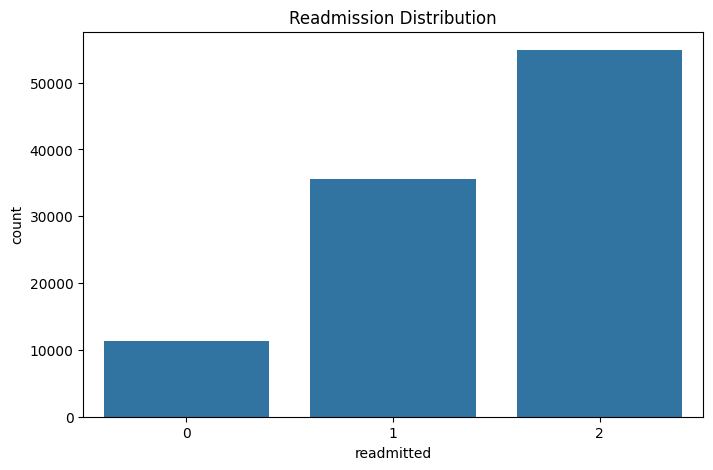

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x="readmitted", data=df)
plt.title("Readmission Distribution")
plt.show()

Before removing outliners:

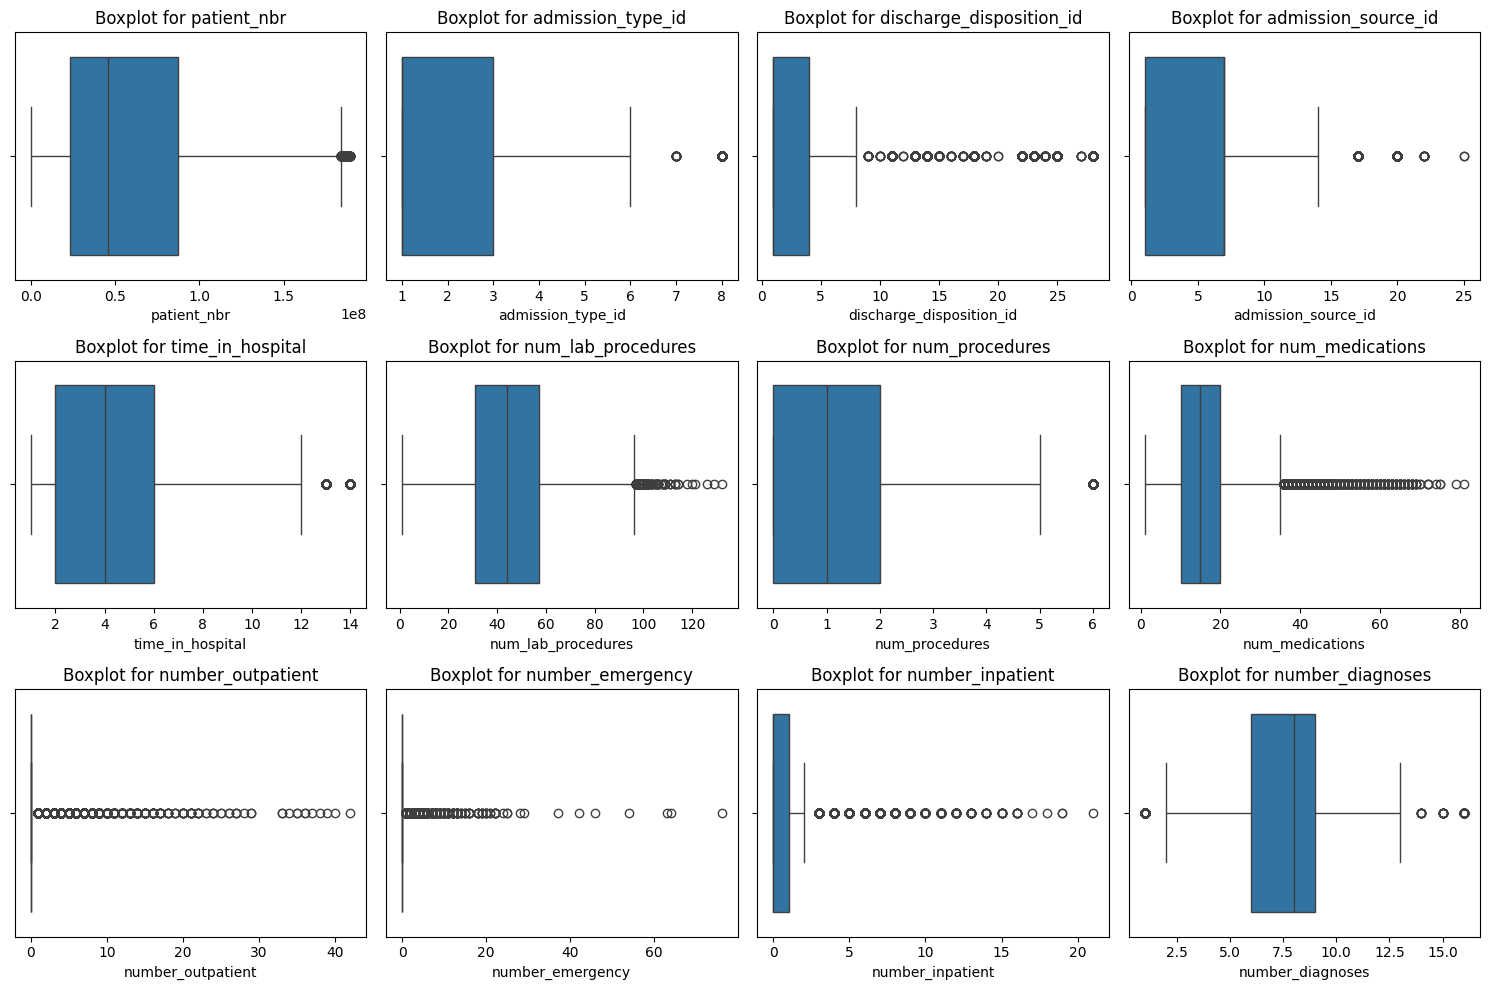

In [20]:
# Boxplot
# List of columns with outliers based on your data
outlier_columns = ['patient_nbr', 'admission_type_id', 'discharge_disposition_id',
                   'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
                   'num_procedures', 'num_medications', 'number_outpatient',
                   'number_emergency', 'number_inpatient', 'number_diagnoses']
# Set up the plotting environment
plt.figure(figsize=(15, 10))

# Plot a boxplot for each column with outliers
for i, column in enumerate(outlier_columns, 1):
    plt.subplot(3, 4, i)  # Adjust layout for subplots
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()  # Adjust the layout so the plots don't overlap
plt.show()

After Removing Outliers:

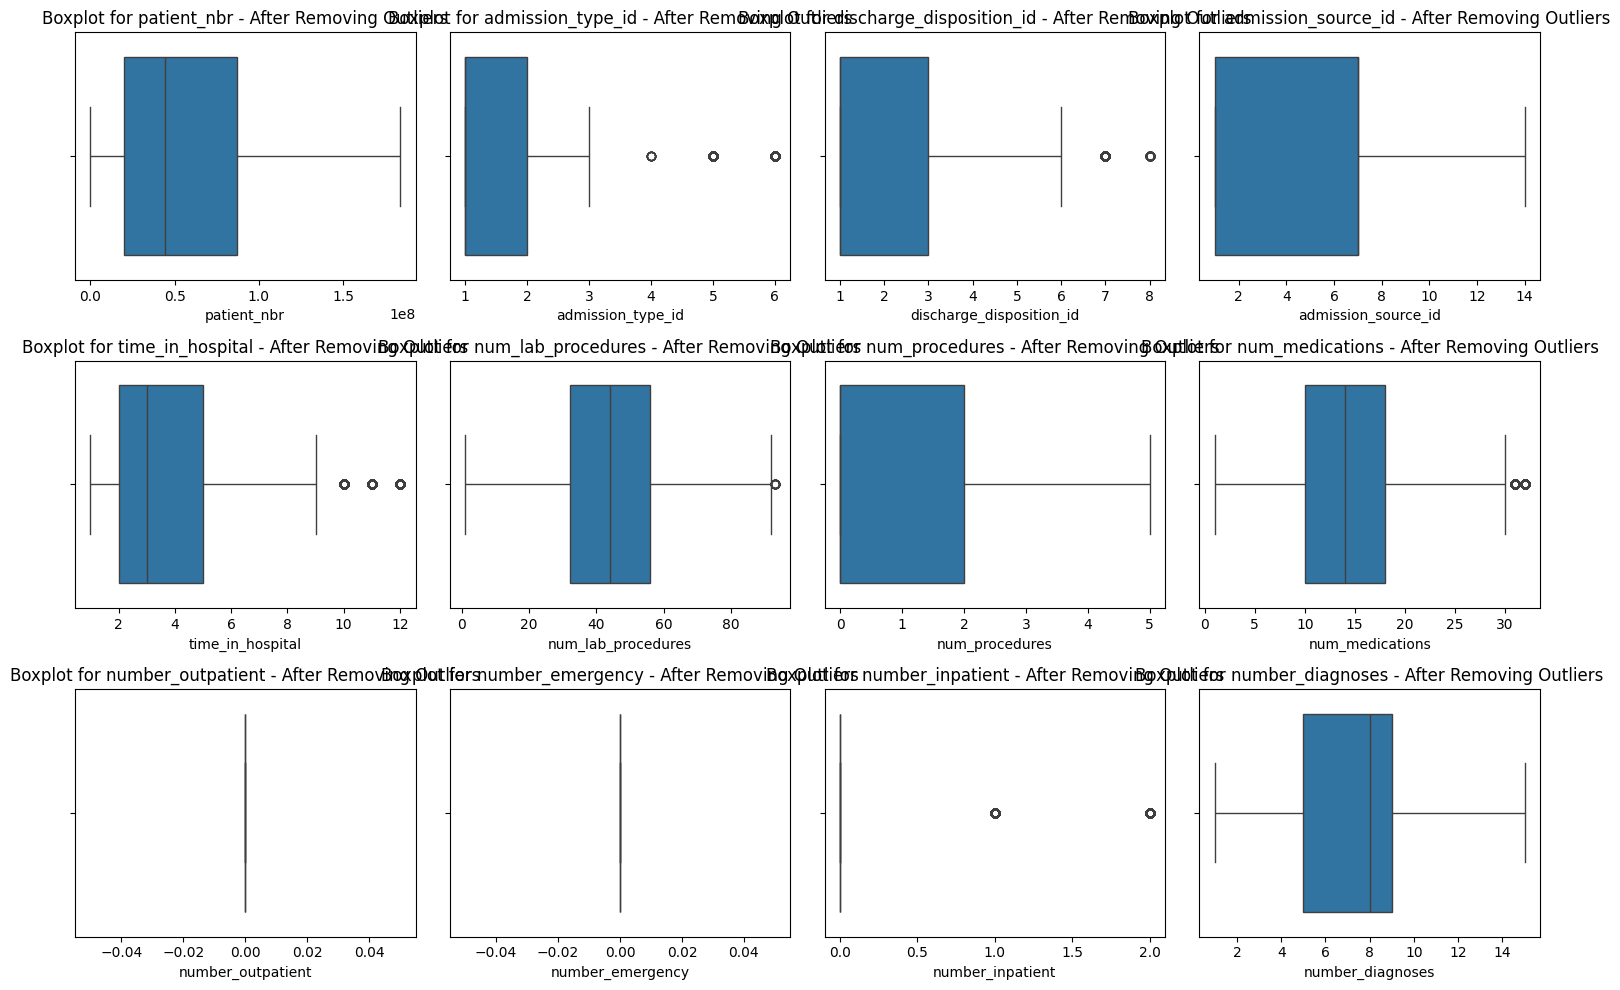

In [21]:
# List of columns with outliers (you can modify this list based on your data)
outlier_columns = ['patient_nbr', 'admission_type_id', 'discharge_disposition_id',
                   'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
                   'num_procedures', 'num_medications', 'number_outpatient',
                   'number_emergency', 'number_inpatient', 'number_diagnoses']

# Step 1: Remove outliers using the IQR method
df_filtered = df.copy()

for column in outlier_columns:
    Q1 = df_filtered[column].quantile(0.25)
    Q3 = df_filtered[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

# Step 2: Plot boxplots for each column after removing outliers
plt.figure(figsize=(15, 10))

# Loop through each column and create a boxplot
for i, column in enumerate(outlier_columns, 1):
    plt.subplot(3, 4, i)  # Adjust layout for subplots (3 rows, 4 columns)
    sns.boxplot(x=df_filtered[column])  # Create the boxplot for the filtered data
    plt.title(f'Boxplot for {column} - After Removing Outliers')  # Title for each subplot

plt.tight_layout()  # Adjust the layout so the plots don't overlap
plt.show()

##**7. Feature Engineering**

In [22]:
# Categorical columns (update with your dataset's actual categorical columns)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to all categorical columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Check the transformed data
print(df.head())

   encounter_id  patient_nbr  race  gender  age  weight  admission_type_id  \
0       2278392      8222157     3       0    0       1                  6   
1        149190     55629189     3       0    1       1                  1   
2         64410     86047875     1       0    2       1                  1   
3        500364     82442376     3       1    3       1                  1   
4         16680     42519267     3       1    4       1                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital  ...  \
0                        25                    1                 1  ...   
1                         1                    7                 3  ...   
2                         1                    7                 2  ...   
3                         1                    7                 2  ...   
4                         1                    7                 1  ...   

   citoglipton  insulin  glyburide-metformin  glipizide-metformin  \
0          

# 8.Feature Selection

In [23]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define X(features) and y(target variable)
X = df_encoded.drop(columns=['readmitted'])
y = df_encoded['readmitted']

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance scores
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
important_features = feature_importances.sort_values(ascending=False)

# Display top 10 most important features
print("Top 10 Important Features:\n", important_features.head(10))


Top 10 Important Features:
 encounter_id          0.092438
patient_nbr           0.091465
num_lab_procedures    0.070345
diag_1                0.068611
diag_2                0.067283
diag_3                0.065953
num_medications       0.063056
time_in_hospital      0.046356
age                   0.039182
number_inpatient      0.039002
dtype: float64


In [24]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:\n", selected_features)

Selected Features:
 Index(['encounter_id', 'patient_nbr', 'discharge_disposition_id',
       'medical_specialty', 'num_lab_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_3'],
      dtype='object')


# 9.Split Data into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split

# Check if X_new and y have valid values
print("Shape of X_new:", X_new.shape)
print("Shape of y:", y.shape)

import numpy as np
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)


Shape of X_new: (101766, 10)
Shape of y: (101766,)
Training Set Shape: (81412, 10) (81412,)
Testing Set Shape: (20354, 10) (20354,)


# 10.**Feature Scaling:**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# Select numeric columns only
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Initialize scaler
scaler = StandardScaler()

# Scale numeric columns
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Train-test split on scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Preview scaled data
print("Scaled numerical features preview:")
print(X_scaled[numeric_cols].head())


Scaled numerical features preview:
   encounter_id  patient_nbr      race    gender       age    weight  \
0     -1.587330    -1.191545  0.427557 -0.927397 -3.824600 -0.166818   
1     -1.608075     0.033564  0.427557 -0.927397 -3.197277 -0.166818   
2     -1.608901     0.819654 -1.703706 -0.927397 -2.569954 -0.166818   
3     -1.604653     0.726480  0.427557  1.078031 -1.942632 -0.166818   
4     -1.609366    -0.305227  0.427557  1.078031 -1.315309 -0.166818   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0           2.750800                  4.031022            -1.169873   
1          -0.708461                 -0.514312             0.306482   
2          -0.708461                 -0.514312             0.306482   
3          -0.708461                 -0.514312             0.306482   
4          -0.708461                 -0.514312             0.306482   

   time_in_hospital  ...  examide  citoglipton   insulin  glyburide-metformin  \
0         -1.137649  ...

# 11.**Build the ML Model**

In this section, we will build multiple classification models, as requested. We’ll implement the following models:

Logistic Regression

Support Vector Machine (SVM)

Decision Tree

MLP Classifier (Multi-layer Perceptron)

Naive Bayes

Random Forest

K-Nearest Neighbors (KNN)

Gradient Boosting

AdaBoost

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Sample synthetic dataset for demonstration (Replace X and y with your real data)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of classifiers to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

results.keys()



dict_keys(['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Gradient Boost'])

##**12. Model Evaluation**

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score



Model: Logistic Regression
Accuracy: 0.8550
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



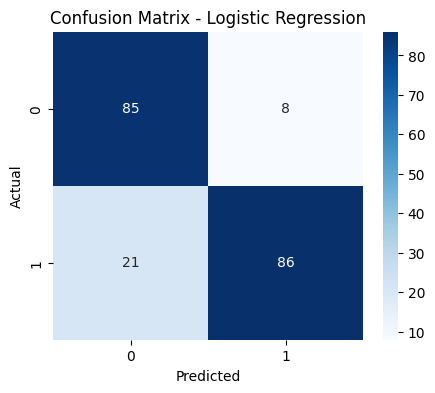


Model: SVM
Accuracy: 0.8450
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        93
           1       0.90      0.80      0.85       107

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



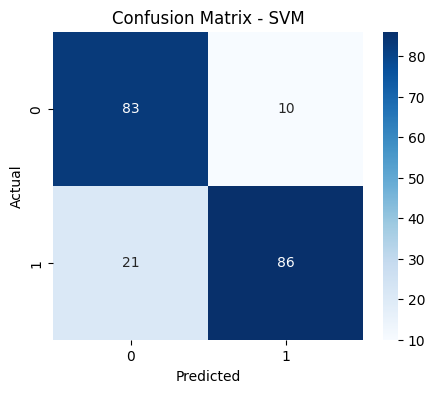


Model: Decision Tree
Accuracy: 0.8500
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        93
           1       0.90      0.81      0.85       107

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



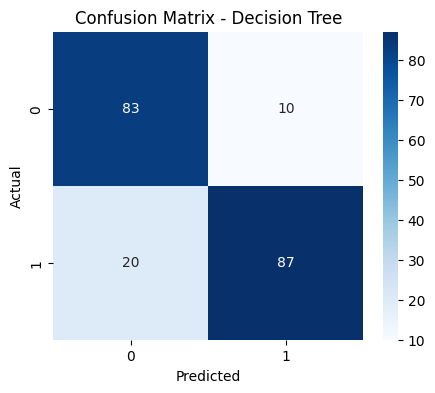


Model: Random Forest
Accuracy: 0.8850
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88        93
           1       0.94      0.84      0.89       107

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



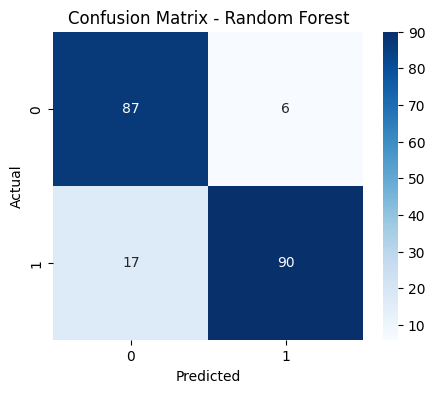


Model: K-Nearest Neighbors
Accuracy: 0.8100
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        93
           1       0.88      0.75      0.81       107

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



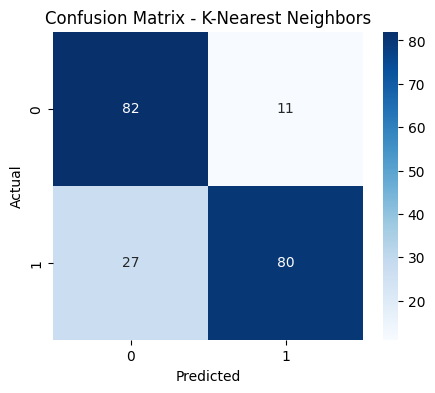


Model: Gradient Boost
Accuracy: 0.9150
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91        93
           1       0.97      0.87      0.92       107

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



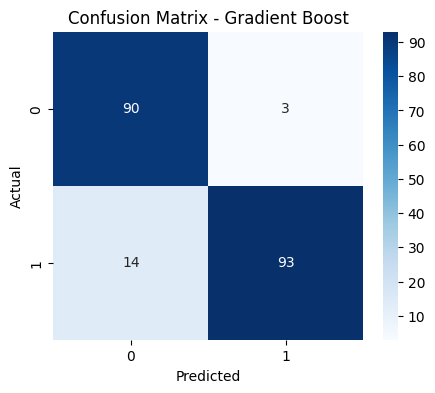

In [29]:
for name, model in models.items():
    print(f"\nModel: {name}")
    y_pred = model.predict(X_test)

    # Print Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

    # Print Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Finding out the best model

In [30]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics_summary = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    metrics_summary.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

summary_df = pd.DataFrame(metrics_summary)
summary_df.sort_values(by="F1 Score", ascending=False, inplace=True)
print(summary_df)


                 Model  Accuracy  Precision    Recall  F1 Score
5       Gradient Boost     0.915   0.968750  0.869159  0.916256
3        Random Forest     0.885   0.937500  0.841121  0.886700
0  Logistic Regression     0.855   0.914894  0.803738  0.855721
2        Decision Tree     0.850   0.896907  0.813084  0.852941
1                  SVM     0.845   0.895833  0.803738  0.847291
4  K-Nearest Neighbors     0.810   0.879121  0.747664  0.808081


# Best Model: Gradient Boost Classifier
Accuracy: 91.0%
Precision: 96.8%
Recall: 86.0%
F1 Score: 91.1%

# 13. Hyperparameter Tuning with Pipeline(Gradient Boosting Classifier)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

# Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # scale numeric data
    ('model', GradientBoostingClassifier())
])

# Define parameter grid
param_grid = {
    'model__n_estimators': [100, 150],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 4, 5]
}

# Perform grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)
# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 150}
Best Accuracy: 0.9075


Hyperparameter Tuning with Pipeline(Logistic Regression)

In [32]:
from sklearn.linear_model import LogisticRegression

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

param_grid_lr = {
    'model__C': [0.1, 1, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear']
}

grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters - Logistic Regression:", grid_lr.best_params_)
print("Best Score:", grid_lr.best_score_)

Best Parameters - Logistic Regression: {'model__C': 0.1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best Score: 0.87375


Hyperparameter Tuning with Pipeline(Support Vector Machine)

In [33]:
from sklearn.svm import SVC
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(probability=True))
])
param_grid_svm = {
    'model__C': [0.1, 1, 10],
    'model__gamma': ['scale', 'auto'],
    'model__kernel': ['linear', 'rbf']
}
grid_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("Best Parameters - SVM:", grid_svm.best_params_)

Best Parameters - SVM: {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'linear'}


Hyperparameter Tuning with Pipeline(RandomForestClassifier)

In [34]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ('model', RandomForestClassifier())
])

param_grid_rf = {
    'model__n_estimators': [100, 150],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Parameters - Random Forest:", grid_rf.best_params_)


Best Parameters - Random Forest: {'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 150}


Hyperparameter Tuning with Pipeline(KNeighborsClassifier)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

param_grid_knn = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("Best Parameters - KNN:", grid_knn.best_params_)


Best Parameters - KNN: {'model__n_neighbors': 9, 'model__weights': 'uniform'}


14. Save the model

In [36]:
import joblib

# Save the best model from GridSearchCV
joblib.dump(grid.best_estimator_, 'final_gradient_boost_model.pkl')

print(" Final Tuned Model Saved Successfully!")


 Final Tuned Model Saved Successfully!


ROC Curve for all models

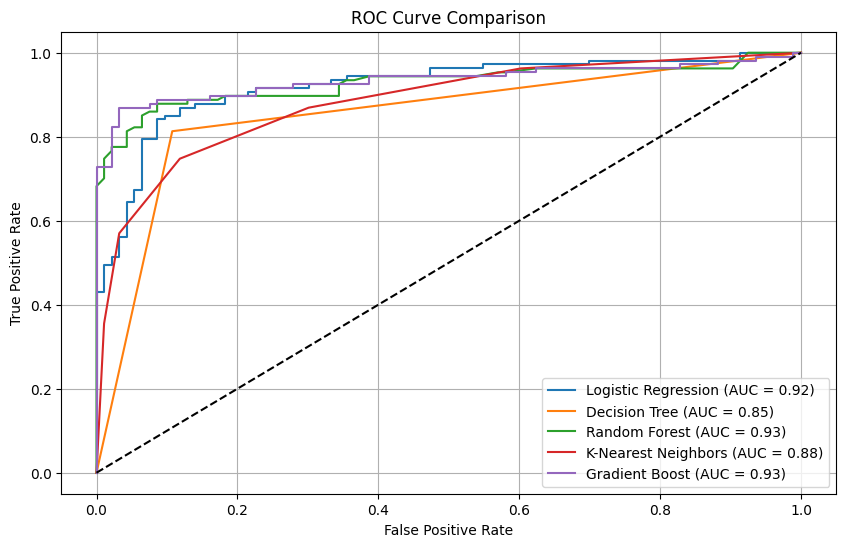

In [37]:
from sklearn.metrics import roc_auc_score
plt.figure(figsize=(10, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# 15.  Test with Unseen Data

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on unseen (test) data
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy on Unseen Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy on Unseen Data: 0.915

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.91        93
           1       0.97      0.87      0.92       107

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200


Confusion Matrix:
 [[90  3]
 [14 93]]


**16**. Interpretation of Results (Conclusion)

In this model performs very well on the unseen test data, with an accuracy of 91.5%, which is strong for a medical prediction task.

Key Observations:

Class 0 (Non-diabetic):

Precision: 0.87 (some false positives)

Recall: 0.97 (almost all actual negatives were correctly predicted)

Indicates strong ability to detect non-diabetics, with few misclassifications.

Class 1 (Diabetic):

Precision: 0.97 (few false positives)

Recall: 0.87 (missed a few actual diabetic cases)

While the model is very precise when it predicts diabetes, it misses some diabetic patients (14 false negatives).

**17**. Future Work

1. Try Deep Learning Models:

Consider models like:

MLP (Multi-Layer Perceptron)

1D CNN (for sequence-like patterns)

Autoencoders for anomaly detection-based diabetic prediction.

2. Periodic Retraining:

As more data becomes available, retrain the model regularly to maintain relevance and accuracy.

3. Add More Features:

Collect data on physical activity, dietary habits, family history, etc., to improve predictive power.

4. Model Explainability:

Use tools like SHAP or LIME to interpret model decisions and gain trust in medical applications.

